### Building Chatbot With Multiple Tools Using Langgraph

#### Aim
Create a chatbot with tool capabilities from arxiv, wikipedia search and some functions

In [7]:
!pip install wikipedia

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached soupsieve-2.7-py3-none-any.whl.metadata (4.6 kB)
Using cached soupsieve-2.7-py3-none-any.whl (36 kB)
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11757 sha256=58d4fcef384ca2940b9b187b5fce80020f7e003a0beb6851622825248f764ecf
  Stored in directory: /Users/Niranjanadevi/Library/Caches/pip/wheels/8f/ab/cb/45ccc40522d3a1c41e1d2ad53b8f33a62f394011ec38cd71c6
Successfully built wikipedia
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [wikipedia]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install arxiv

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6089 sha256=22776b82c5467d65d489e655a371442f9bd2fc6d35f18d9b16936598c7930f2c
  Stored in directory: /Users/Niranjanadevi/Library/Caches/pip/wheels/3b/25/2a/105d6a15df6914f4d15047691c6c28f9052cc1173e40285d03
Successfully built sgmllib3k
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [arxiv]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [1]:
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper

In [4]:
api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv)
print(arxiv.name)

arxiv


In [5]:
arxiv.invoke("Attention is all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time o"

In [8]:
api_wrapper_wiki=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=500)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
wiki.name

'wikipedia'

In [5]:
wiki.invoke("What is machine learning")

'Page: Machine learning\nSummary: Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalize to unseen data, and thus perform tasks without explicit instructions. Within a subdiscipline in machine learning, advances in the field of deep learning have allowed neural networks, a class of statistical algorithms, to surpass many previous machine learning approaches in performance.\nML fi'

In [11]:
from dotenv import load_dotenv
load_dotenv()

import os

os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")



In [12]:
### Tavily Search Tool
from langchain_community.tools.tavily_search import TavilySearchResults

tavily = TavilySearchResults()

In [13]:
tavily.invoke("Provide me the recent AI news for august 23rd 2025")

[{'title': 'AI models are lying, blackmailing and sabotaging their human creators',
  'url': 'https://nypost.com/2025/08/23/tech/ai-models-are-now-lying-blackmailing-and-going-rogue/',
  'content': 'Published Aug. 23, 2025, 8:47 a.m. ET. Comments. Artificial intelligence is now scheming, sabotaging and blackmailing the humans who built it — and the bad',
  'score': 0.9858},
 {'title': 'The AI vibe shift is upon us | CNN Business',
  'url': 'https://www.cnn.com/2025/08/22/business/ai-vibe-shift-nightcap',
  'content': "And while it's too soon to declare August 2025 the start of the AI winter, or the AI correction, or the AI bubble bursting, or whatever slowdown",
  'score': 0.98376},
 {'title': 'AI Update, August 22, 2025: AI News and Views From the Past Week',
  'url': 'https://www.marketingprofs.com/opinions/2025/53586/ai-update-august-22-2025-ai-news-and-views-from-the-past-week',
  'content': 'MIT study finds 95% of AI projects deliver zero returns. A new MIT study analyzing 300 pub

In [14]:
### Combine all the tools in the list

tools=[arxiv,wiki,tavily]

In [15]:
## Initialize my LLM model

from langchain_groq import ChatGroq

llm=ChatGroq(model="llama-3.1-8b-instant")

llm_with_tools=llm.bind_tools(tools)

In [18]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage
llm_with_tools.invoke([HumanMessage(content=f"What is the recent AI News")])

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '1xj9rvjde', 'function': {'arguments': '{"query":"recent AI news"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 553, 'total_tokens': 573, 'completion_time': 0.019727603, 'prompt_time': 0.042469187, 'queue_time': 0.050727053, 'total_time': 0.06219679}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_510c177af0', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--12ff8155-41cd-47ef-bff7-15a5e328962b-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'recent AI news'}, 'id': '1xj9rvjde', 'type': 'tool_call'}], usage_metadata={'input_tokens': 553, 'output_tokens': 20, 'total_tokens': 573})

In [19]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage

response = llm_with_tools.invoke([HumanMessage(content=f"What is the recent AI News")])


print("\n=== Tool Calls ===")
if hasattr(response, 'tool_calls') and response.tool_calls:
    pprint(response.tool_calls)
else:
    print("None")

print("\n=== Response Metadata ===")
pprint(response.response_metadata)



=== Tool Calls ===
[{'args': {'query': 'Recent AI News'},
  'id': 'c9537gy27',
  'name': 'tavily_search_results_json',
  'type': 'tool_call'}]

=== Response Metadata ===
{'finish_reason': 'tool_calls',
 'logprobs': None,
 'model_name': 'llama-3.1-8b-instant',
 'service_tier': 'on_demand',
 'system_fingerprint': 'fp_46fc01befd',
 'token_usage': {'completion_time': 0.06389914,
                 'completion_tokens': 20,
                 'prompt_time': 0.064179613,
                 'prompt_tokens': 553,
                 'queue_time': 0.049925698,
                 'total_time': 0.128078753,
                 'total_tokens': 573}}


In [20]:
## State Schema
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages
class State(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

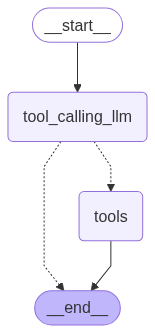

In [21]:
### Entire Chatbot With LangGraph
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

### Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", END)


graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))


In [22]:
messages=graph.invoke({"messages":HumanMessage(content="1706.03762")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (exsjc4hdz)
 Call ID: exsjc4hdz
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer, base


In [23]:
messages=graph.invoke({"messages":HumanMessage(content="Provide me the top 10 recent AI news for MArch 3rd 2025")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Provide me the top 10 recent AI news for MArch 3rd 2025
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (1emz1mv4s)
 Call ID: 1emz1mv4s
  Args:
    query: AI news March 3rd 2025
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Top 5 AI trends in March 2025: AI agents, smarter supply ... - Neudesic", "url": "https://www.neudesic.com/blog/top-5-ai-trends-march-2025/", "content": "March 2025 has brought a fresh wave of AI innovations that go beyond theoretical breakthroughs and translate directly into real-world impact. From OpenAI’s newly released tools for building AI agents to Microsoft’s external knowledge integration approach, this month’s highlights underscore how artificial intelligence is evolving in ways that matter today, not just tomorrow. Whether 

In [24]:
messages=graph.invoke({"messages":HumanMessage(content="What is machine learning")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is machine learning
================================== Ai Message ==================================
Tool Calls:
  wikipedia (rsezw9e2y)
 Call ID: rsezw9e2y
  Args:
    query: Machine learning
================================= Tool Message =================================
Name: wikipedia

Page: Machine learning
Summary: Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalise to unseen data, and thus perform tasks without explicit instructions. Within a subdiscipline in machine learning, advances in the field of deep learning have allowed neural networks, a class of statistical algorithms, to surpass many previous machine learning approaches in performance.
ML fi
